# Lab 5: Color based image feature extraction


Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: 17/10/2023

---------------

## `Objective`:  
1. Reshape the image  
1. Mean of the colour components  
1. Compare Histogram of each colour component  
1. Compare the similarity score  
1. Comparing the similarity between 2 images

## `Theory`:  
1. **Reshape the Image**
    1. Reshaping an image refers to changing its dimensions or structure. In the context of image processing, reshaping often refers to changing the spatial dimensions of the image, such as width and height. However, it can also refer to changing the structure of the data array, like converting a 2D image into a 1D array. Reshaping is different from resizing. While resizing changes the resolution of the image and may involve interpolation or decimation, reshaping changes the way the data is organized without altering the actual pixel values.

1. **Mean of the Colour Components**
    1. Images in the RGB color space have three channels: Red, Green, and Blue. The mean of the color components refers to the average value of pixel intensities for each of these channels. For an RGB image, this would involve calculating three means: one for the Red channel, one for the Green channel, and one for the Blue channel. This gives an overall sense of the dominant colors and brightness in the image.

1. **Compare Histogram of Each Colour Component**
    1. A histogram represents the distribution of pixel intensities in an image. For color images, we often look at the histogram for each color channel separately. By comparing the histograms of each color component, we can get insights into the color distribution and intensity distribution of the image. For instance, a peak in the red histogram at high intensities might indicate that there are many bright red pixels in the image.

1. **Compare the Similarity Score**
    1. The similarity score between two histograms provides a measure of how similar two distributions are. There are various methods to compare histograms, such as:
        1. Chi-Squared distance: Measures the squared difference between two histograms.
        1. Correlation: Measures how correlated the pixel values of two histograms are.
        1. Bhattacharyya distance: Measures the overlap between two histograms.
    1. A lower value typically indicates that the histograms are more similar, while a higher value indicates they are different. However, the interpretation can vary based on the method used.

1. **Comparing the Similarity Between 2 Images**
    1. Comparing the similarity between two images is a fundamental task in image processing. The goal is to determine how alike two images are. This can be done in various ways:

        1. Histogram Comparison: As discussed, by comparing the histograms of two images, we can get a sense of how similar their color distributions are.
        1. Structural Similarity Index (SSIM): This method considers changes in structural information, luminance, and texture.
        1. Mean Squared Error (MSE): Represents the average squared differences between the pixel values of two images.
        1. Feature Matching: Extract features from both images and see how many match. This is often done in the context of object recognition.

## `Code`:

In [20]:
# importing all the necessary libraries/modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform

In [2]:
# importing the image
image = cv2.imread("D:/Z/Downloads/rhino1.jpeg") # original
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB 

**1.1) Reshaping by flattening**

In [3]:
# Reshape the Image
reshaped_image = image_rgb.flatten()

In [4]:
print(f'The dimension of the original image is {len(image.shape)}\nThe dimension of the reshaped image is {len(reshaped_image.shape)}')

The dimension of the original image is 3
The dimension of the reshaped image is 1


**1.2) Reshaping through transform**

In [21]:
# defining a new size
new_shape = (200, 200)

# applying the transformation
reshaped_image_ = transform.resize(image_rgb, new_shape, anti_aliasing=True)

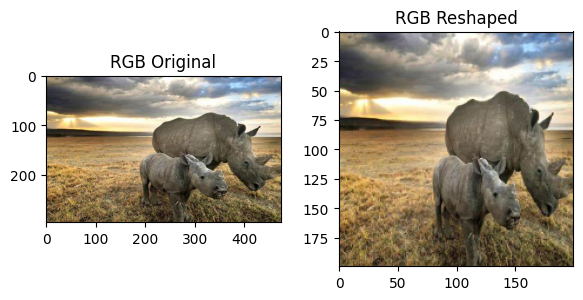

In [23]:
#sub-plotting
fig1, ax = plt.subplots(1, 2, figsize = (6, 6))
fig1.tight_layout()

ax[0].imshow(image_rgb)
ax[0].set_title("RGB Original")

ax[1].imshow(reshaped_image_)
ax[1].set_title("RGB Reshaped")
plt.show()

**2.1) Mean of colour components overall**

In [5]:
# Mean of the Colour Components
mean_r = np.mean(image_rgb[:,:,0])
mean_g = np.mean(image_rgb[:,:,1])
mean_b = np.mean(image_rgb[:,:,2])

In [6]:
print(f'The total mean of the RED component is {mean_r}\nTHe total mean of the GREEN component is {mean_g}\nThe total mean of the BLUE component is {mean_b}')

The total mean of the RED component is 139.66616062264796
THe total mean of the GREEN component is 126.98630830197285
The total mean of the BLUE component is 104.18540455011974


**2.2) Mean of the colour components at each pixel**

In [7]:
def meanOfImage(image):
    
    mean_image = np.zeros((image.shape[0], image.shape[1]))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            mean = np.mean(image[i][j])
            mean_image[i][j] = mean
            
    return mean_image

In [8]:
# applying the above created function to RGB image
mean_rgb_image = meanOfImage(image_rgb)

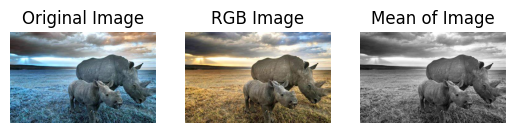

In [9]:
# displaying the pictures
plt.subplot(131),plt.imshow(image, cmap = 'gray'),plt.title('Original Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_rgb, cmap = 'gray'),plt.title('RGB Image'),plt.axis('off')
plt.subplot(133),plt.imshow(mean_rgb_image, cmap = 'gray'),plt.title('Mean of Image'),plt.axis('off')
plt.show()

**3) Comparing Histogram of of each colour component**

In [10]:
def compareHistogram(image):

    # Comparing the Histogram of Each Colour Component
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

    # Plotting the histograms
    plt.figure(figsize=(10, 5))

    plt.plot(hist_r, color='red', label='Red Histogram')
    plt.plot(hist_g, color='green', label='Green Histogram')
    plt.plot(hist_b, color='blue', label='Blue Histogram')

    plt.title('Color Histograms')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

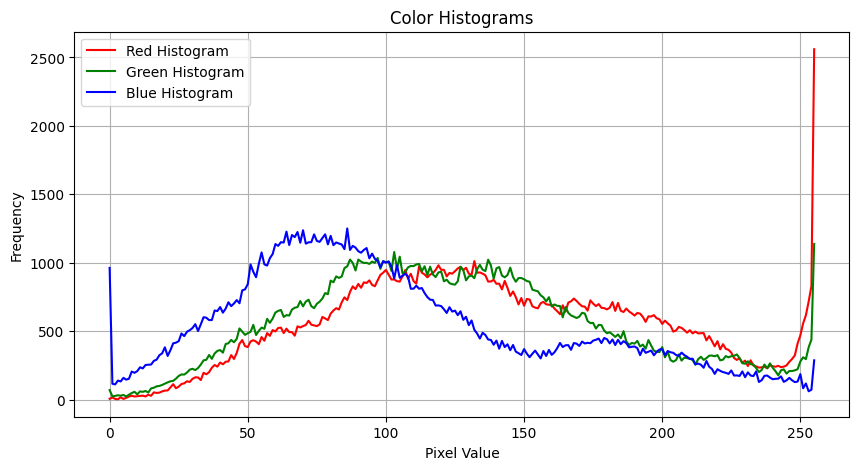

In [11]:
# recalling the above created function
compareHistogram(image_rgb)

**4) Similarity Score**

In [12]:
# Comparing Histogram of Each Colour Component
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Calculate similarity scores for all combinations
score_rg = cv2.compareHist(hist_r, hist_g, cv2.HISTCMP_BHATTACHARYYA)
score_rb = cv2.compareHist(hist_r, hist_b, cv2.HISTCMP_BHATTACHARYYA)
score_gb = cv2.compareHist(hist_g, hist_b, cv2.HISTCMP_BHATTACHARYYA)

In [13]:
print("Similarity Score between R and G histograms:", score_rg)
print("Similarity Score between R and B histograms:", score_rb)
print("Similarity Score between G and B histograms:", score_gb)

Similarity Score between R and G histograms: 0.09637463723518491
Similarity Score between R and B histograms: 0.24553947314132413
Similarity Score between G and B histograms: 0.18825063268182837


**5) Comparing the similarity between 2 images**

In [14]:
def compareHist(image):
    # Comparing the Histogram of Each Colour Component
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    
    return hist_r, hist_g, hist_b

In [15]:
def compareImages(image1, image2, score=False):
    hist_r1, hist_g1, hist_b1 = compareHist(image1)
    hist_r2, hist_g2, hist_b2 = compareHist(image2)
    
    # Plotting the histograms side by side
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    
    axs[0].plot(hist_r1, color='red', label='Red Histogram')
    axs[0].plot(hist_g1, color='green', label='Green Histogram')
    axs[0].plot(hist_b1, color='blue', label='Blue Histogram')
    axs[0].set_title('Image 1 Color Histograms')
    axs[0].set_xlabel('Pixel Value')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(hist_r2, color='red', label='Red Histogram')
    axs[1].plot(hist_g2, color='green', label='Green Histogram')
    axs[1].plot(hist_b2, color='blue', label='Blue Histogram')
    axs[1].set_title('Image 2 Color Histograms')
    axs[1].set_xlabel('Pixel Value')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.show()
    
    if score:
        # Calculating similarity scores for all combinations
        score_rg1 = cv2.compareHist(hist_r1, hist_g1, cv2.HISTCMP_BHATTACHARYYA)
        score_rb1 = cv2.compareHist(hist_r1, hist_b1, cv2.HISTCMP_BHATTACHARYYA)
        score_gb1 = cv2.compareHist(hist_g1, hist_b1, cv2.HISTCMP_BHATTACHARYYA)
        
        score_rg2 = cv2.compareHist(hist_r2, hist_g2, cv2.HISTCMP_BHATTACHARYYA)
        score_rb2 = cv2.compareHist(hist_r2, hist_b2, cv2.HISTCMP_BHATTACHARYYA)
        score_gb2 = cv2.compareHist(hist_g2, hist_b2, cv2.HISTCMP_BHATTACHARYYA)
        
        print("Image 1:\n------------------------")
        print("Similarity Score between R and G histograms:", score_rg1)
        print("Similarity Score between R and B histograms:", score_rb1)
        print("Similarity Score between G and B histograms:", score_gb1)
        
        print("\nImage 2:\n------------------------")
        print("Similarity Score between R and G histograms:", score_rg2)
        print("Similarity Score between R and B histograms:", score_rb2)
        print("Similarity Score between G and B histograms:", score_gb2)

In [16]:
# importing the second image
image2 = cv2.imread('D:/Z/Downloads/rhino2.jpg') # original
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # RGB

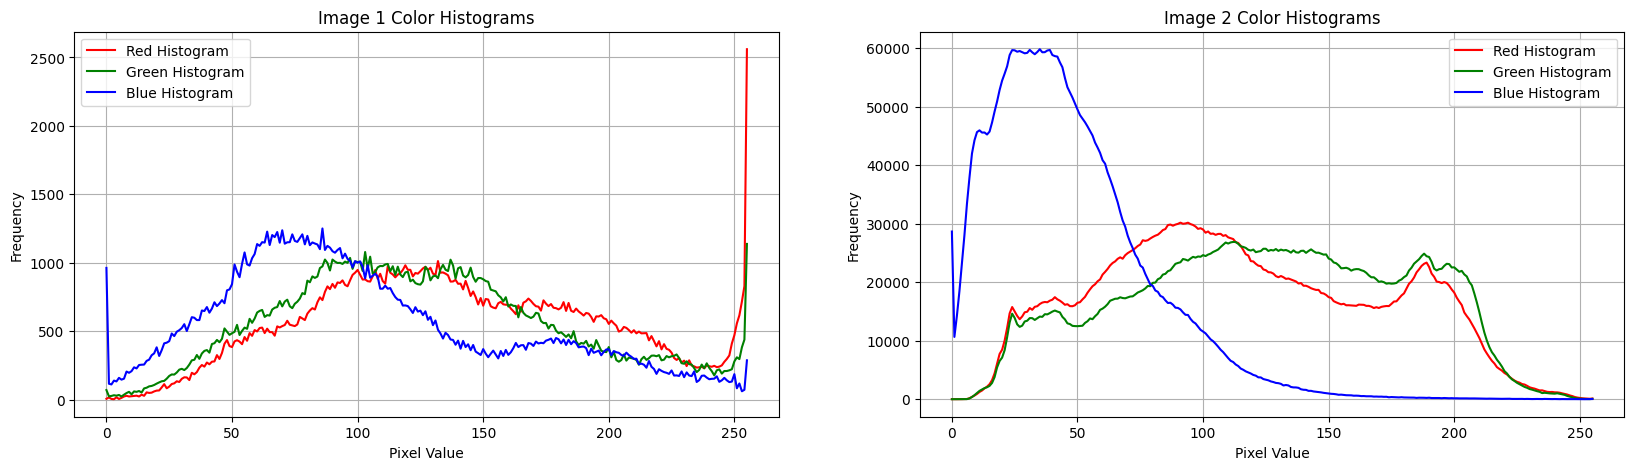

In [17]:
compareImages(image_rgb, image2_rgb)

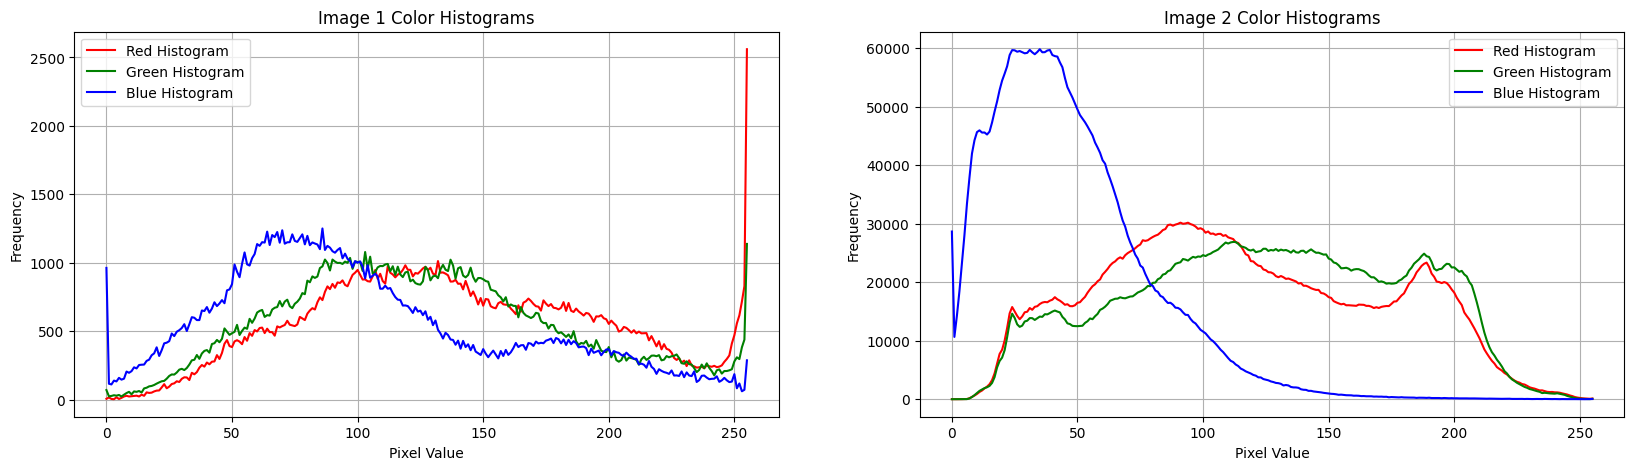

Image 1:
------------------------
Similarity Score between R and G histograms: 0.09637463723518491
Similarity Score between R and B histograms: 0.24553947314132413
Similarity Score between G and B histograms: 0.18825063268182837

Image 2:
------------------------
Similarity Score between R and G histograms: 0.08308727965176746
Similarity Score between R and B histograms: 0.5338252956793321
Similarity Score between G and B histograms: 0.5803306968464672


In [18]:
compareImages(image_rgb, image2_rgb, score=True)

<hr>